# NBACK_CLASSIFICATION BRANCH 
- 2-back classify same(1) or different(2). 
- 2 stimuli, 30 trials per episode
    - NB more than 2 stimuli makes "different" more likely. this might introduce a bias when numstim>2

In [142]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### depth matters
- 3back+10depth=nogood
- 3back+20depth=good
- when sweeping nback keep in mind depth might interact. that is, larger nback might require more depth to perform at same level

ADAM005
0.0 0.7050538
0.05 2.3608549
0.1 0.898908
0.15 2.2449524
0.2 1.8114862
0.25 2.0773842
0.3 0.72707194
0.35 2.8683896
0.4 0.9784775
0.45 0.94617677
0.5 1.6222136
0.55 2.439255
0.6 2.5468566
0.65 1.5321398
0.7 0.0018564566
0.75 1.6119839
0.8 2.0171587
0.85 0.57761
0.9 0.39927226
0.95 1.8826916


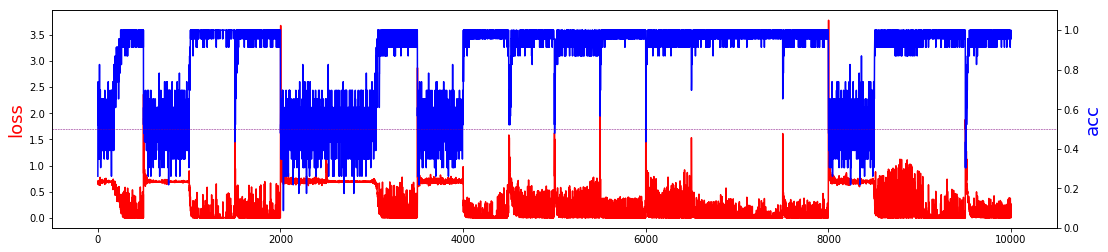

In [140]:
ML = MetaLearner(stsize=50,depth=20,nback=3)
trainer=Trainer(ML,nback=3)
train_loss,train_acc = trainer.train_loop(10000,500)
plt_loss_acc(train_loss,train_acc)

In [166]:
def plt_loss_acc(plt_loss,plt_acc,scatter=False):
  plt.figure(figsize=(18,4))
  ax1 = plt.gca()
  ax1.plot(plt_loss,c='r')
  ax1.set_ylabel('loss',color='red',fontsize=18)
  ax2 = ax1.twinx()
  ax2.plot(plt_acc,c='b')
  ax2.set_ylabel('acc',color='b',fontsize=18)
  ax2.set_ylim(-.1,1.1)
  ax2.axhline(0.5,c='purple',ls='--',lw=.5)
  if scatter:
    ax1.scatter(np.arange(0,len(plt_loss)),plt_loss,c='r')
    ax2.scatter(np.arange(0,len(plt_acc)),plt_acc,c='b')


## load trained models

In [147]:
mdirL = glob('models/sweep_N/st*')
fpath = mdirL[0]


ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_4/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_5/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_2/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_10/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_7/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_9/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_8/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_6/final


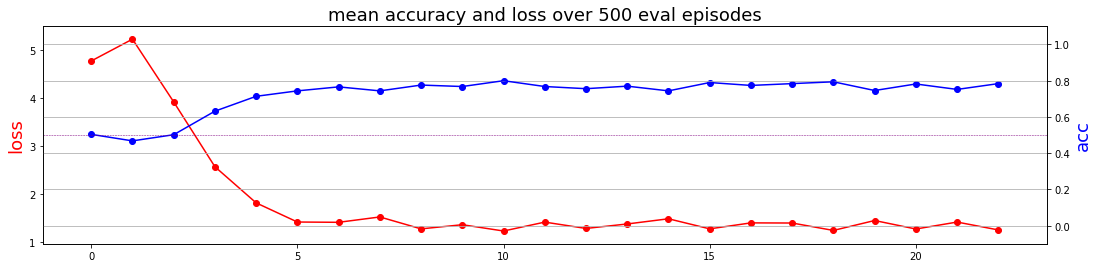

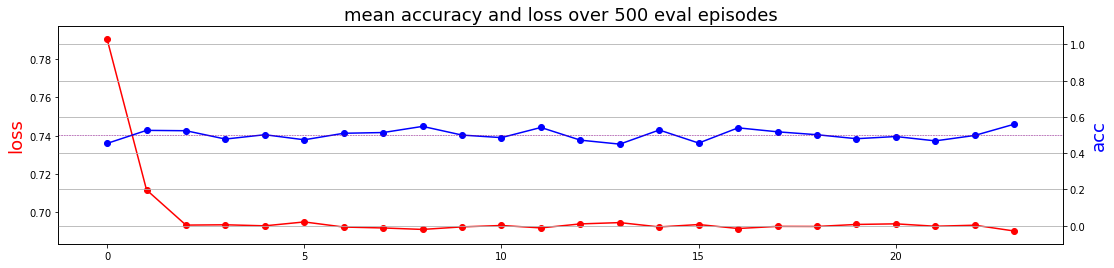

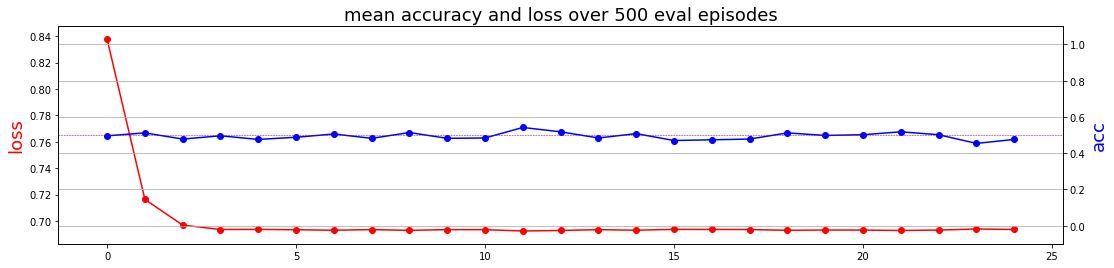

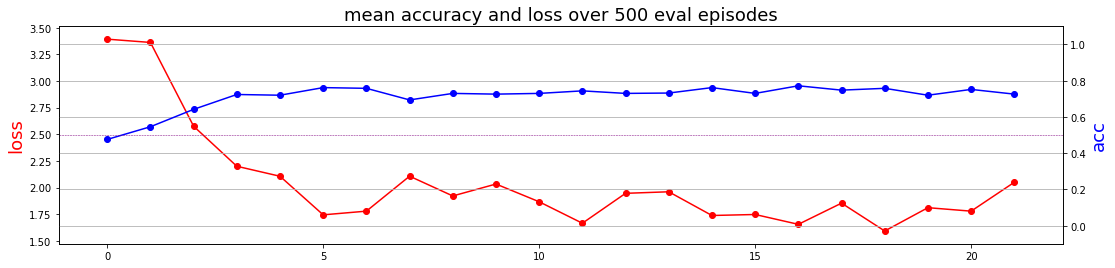

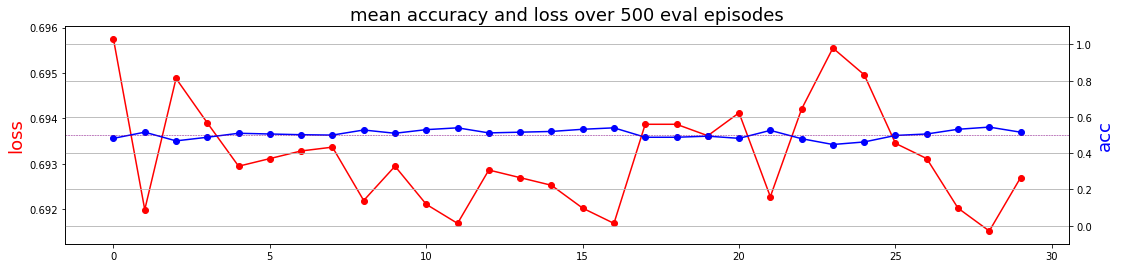

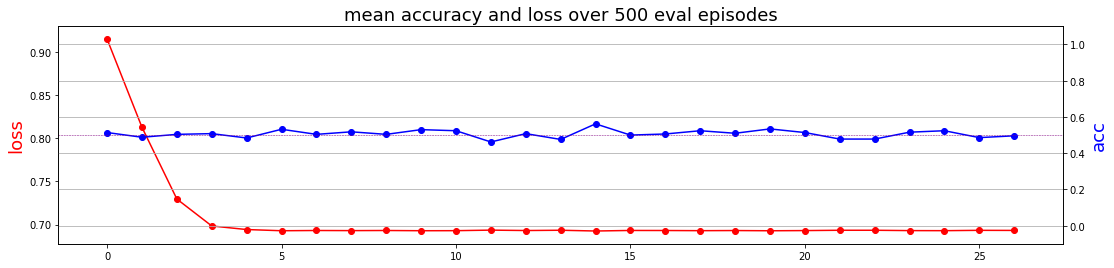

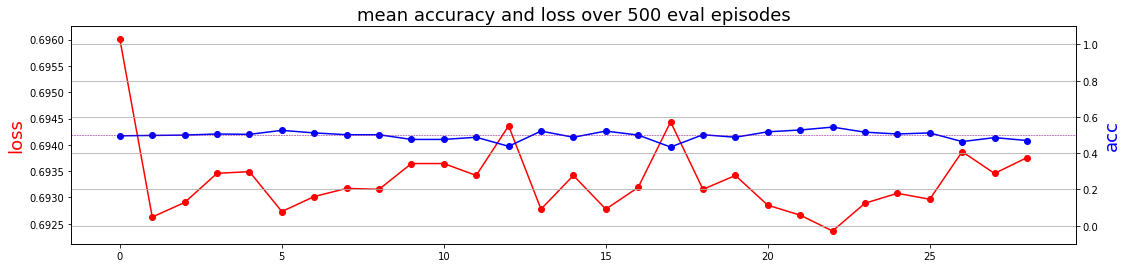

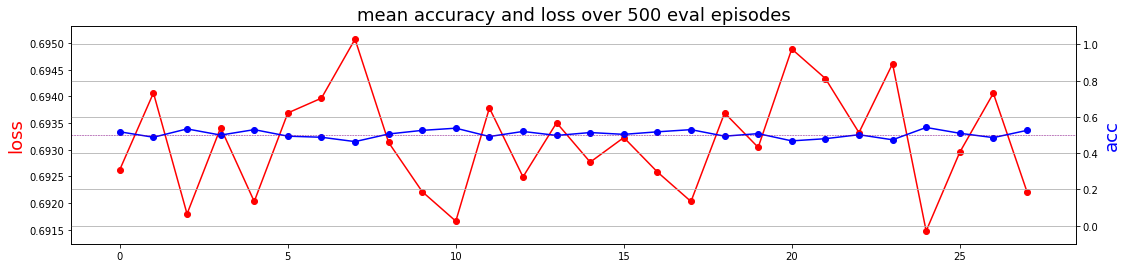

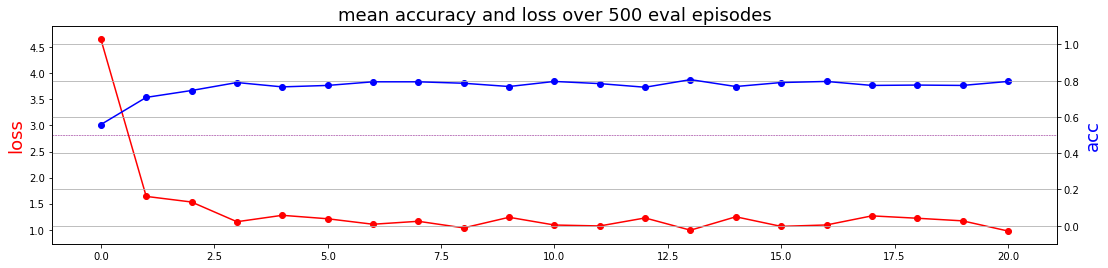

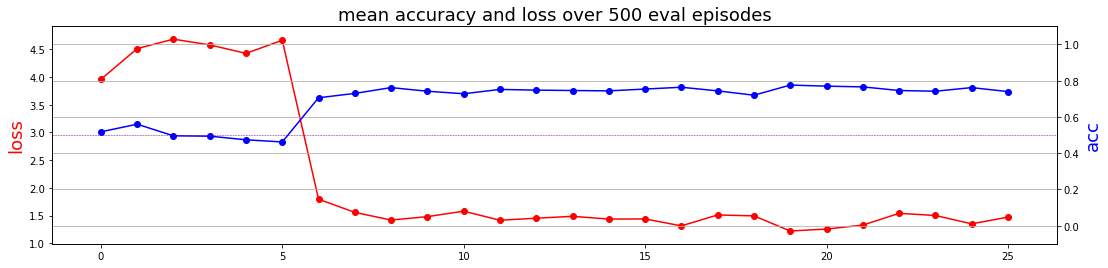

In [172]:
for fpath in mdirL:
  # load model
  nback = int(fpath.split('-')[-1].split('_')[-1])
  fpath += '/final'
  stsize = 50
  depth = 20
  ML = MetaLearner(stsize,depth,nback)
  ML.saver_op.restore(ML.sess,fpath)
  # plt and save fig
  trainer = Trainer(ML)
  eval_loss,eval_acc = trainer.eval_loop(500)
  Mloss = np.mean(eval_loss,0)
  Macc = np.mean(eval_acc,0)
  plt_loss_acc(Mloss,Macc,scatter=True)
  plt.grid()
  plt.title('mean accuracy and loss over 500 eval episodes',fontsize=18)
  plt.savefig('figures/sweep_N/st50-depth50_nback_%i'%(nback))

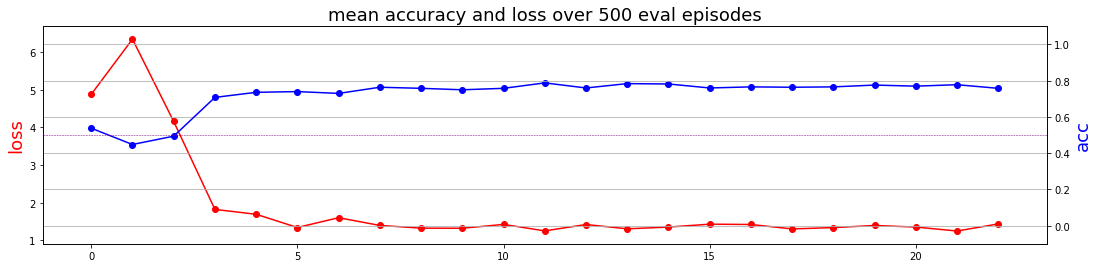